In [1]:
import sys
!{sys.executable} -m pip install snap-stanford

In [193]:
import snap
import pandas as pd
import numpy as np
import operator
import statistics
import chardet
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Facebook (undirected)

In [76]:
nodes = list(range(100,250))
count = len(nodes)

In [77]:
fb = snap.LoadEdgeList(snap.TUNGraph, "facebook_combined.txt", 0, 1)
sub_fb = fb.GetSubGraph(nodes)
sub_fb.GetEdges()

400

In [78]:
sub_fb.GetNodes()

150

### FB network data has been preprocessed. A subgraph of the network with 150 nodes and 400 edges will be analyzed.

In [140]:
labels_fb = {}
for NI in sub_fb.Nodes():
    labels_fb[NI.GetId()] = str(NI.GetId())
sub_fb.DrawGViz(snap.gvlNeato, "output_fb3.png", " ", labels_fb)

![alt text](output_fb3.png)

### Average distance and diameter

In [141]:
result = sub_fb.GetBfsEffDiam(count, nodes, False)
avg_dist = result[0]
diameter = result[2]

In [142]:
dist = pd.DataFrame([[avg_dist, diameter]], columns=['Avg Distance', 'Diameter'])
dist

,Avg Distance,Diameter
0,4.512939,9


### Degree centrality

In [143]:
dc = {}
for NI in sub_fb.Nodes():
    dc[NI.GetId()] = sub_fb.GetDegreeCentr(NI.GetId())

In [144]:
max_dc = max(dc.items(), key=operator.itemgetter(1))[0]
max_dc

119

In [145]:
avg_dc = statistics.mean(dc.values())
avg_dc

0.035794183445190156

In [146]:
dcs = pd.DataFrame([[max_dc, dc[max_dc], avg_dc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
dcs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,119,0.174497,0.035794


### Betweenness centrality

In [147]:
bc = {}
Nodes, Edges = sub_fb.GetBetweennessCentr(1.0)

for n in Nodes:
    bc[n] = Nodes[n]

In [148]:
max_bc = max(bc.items(), key=operator.itemgetter(1))[0]
max_bc

119

In [149]:
avg_bc = statistics.mean(bc.values())
avg_bc

65.27333333333334

In [150]:
bcs = pd.DataFrame([[max_bc, bc[max_bc], avg_bc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
bcs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,119,1032.136276,65.273333


### Closeness centrality

In [151]:
cc = {}
for NI in sub_fb.Nodes():
    cc[NI.GetId()] = sub_fb.GetClosenessCentr(NI.GetId())

In [152]:
max_cc = max(cc.items(), key=operator.itemgetter(1))[0]
max_cc

239

In [153]:
avg_cc = statistics.mean(cc.values())
avg_cc

0.1374593159491711

In [154]:
ccs = pd.DataFrame([[max_cc, cc[max_cc], avg_cc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
ccs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,239,0.297677,0.137459


### Clustering coefficient

In [131]:
ccf = sub_fb.GetClustCf(-1)
ccf

0.37629102136253845

### Bridges

In [134]:
n1 = []
n2 = []
b = sub_fb.GetEdgeBridges()
for e in b:
    n1.append(e.GetVal1())
    n2.append(e.GetVal2())

In [136]:
bs = pd.DataFrame(columns=['1st Node of Bridge', '2nd Node of Bridge'])
bs['1st Node of Bridge'] = n1
bs['2nd Node of Bridge'] = n2
bs

,1st Node of Bridge,2nd Node of Bridge
0,120,247
1,120,136
2,166,198
3,163,173
4,130,191
5,155,157
6,124,157
7,124,170
8,159,172
9,117,231


In [137]:
bridge_count = len(bs)
bridge_count

29

## Twitch (undirected)

In [70]:
# get first 150 unique nodes in Twitch graph
nodes = []
n = 150
counter = 0

with open('twitch8.txt', encoding="utf8") as infile:
    for line in infile:
        if counter == n: 
            break
            
        node = int(line.split()[0])
        if node not in nodes:
            nodes.append(node)
            counter = counter + 1

In [71]:
count = len(nodes)
count

150

In [72]:
tw = snap.LoadEdgeList(snap.TUNGraph, "twitch8.txt", 0, 1)
tw.GetEdges()

426800

In [74]:
sub_tw = tw.GetSubGraph(nodes)
sub_tw.GetEdges()

422

In [75]:
sub_tw.GetNodes()

150

### Twitch network data has been preprocessed. A subgraph of the network with 150 nodes and 422 edges will be analyzed.

In [122]:
labels_tw = {}
for NI in sub_tw.Nodes():
    labels_tw[NI.GetId()] = str(NI.GetId())
sub_tw.DrawGViz(snap.gvlNeato, "output_tw.png", " ", labels_tw)

![alt text](output_tw.png)

### Average distance and diameter

In [123]:
result = sub_tw.GetBfsEffDiam(count, nodes, False)
avg_dist = result[0]
diameter = result[2]

In [124]:
dist = pd.DataFrame([[avg_dist, diameter]], columns=['Avg Distance', 'Diameter'])
dist

,Avg Distance,Diameter
0,3.670365,6


### Degree centrality

In [125]:
dc = {}
for NI in sub_tw.Nodes():
    dc[NI.GetId()] = sub_tw.GetDegreeCentr(NI.GetId())

In [126]:
max_dc = max(dc.items(), key=operator.itemgetter(1))[0]
max_dc

127

In [127]:
avg_dc = statistics.mean(dc.values())
avg_dc

0.03776286353467562

In [128]:
dcs = pd.DataFrame([[max_dc, dc[max_dc], avg_dc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
dcs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,127,0.348993,0.037763


### Betweenness centrality

In [129]:
bc = {}
Nodes, Edges = sub_tw.GetBetweennessCentr(1.0)

for n in Nodes:
    bc[n] = Nodes[n]

In [130]:
max_bc = max(bc.items(), key=operator.itemgetter(1))[0]
max_bc

127

In [131]:
avg_bc = statistics.mean(bc.values())
avg_bc

128.34666666666666

In [132]:
bcs = pd.DataFrame([[max_bc, bc[max_bc], avg_bc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
bcs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,127,3321.937563,128.346667


### Closeness centrality

In [133]:
cc = {}
for NI in sub_tw.Nodes():
    cc[NI.GetId()] = sub_tw.GetClosenessCentr(NI.GetId())

In [134]:
max_cc = max(cc.items(), key=operator.itemgetter(1))[0]
max_cc

127

In [135]:
avg_cc = statistics.mean(cc.values())
avg_cc

0.32140222401595264

In [137]:
ccs = pd.DataFrame([[max_cc, cc[max_cc], avg_cc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
ccs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,127,0.52453,0.321402


### Clustering coefficient

In [155]:
ccf = sub_tw.GetClustCf(-1)
ccf

0.1814332303155832

In [156]:
n1 = []
n2 = []
b = sub_tw.GetEdgeBridges()
for e in b:
    n1.append(e.GetVal1())
    n2.append(e.GetVal2())

In [157]:
bs = pd.DataFrame(columns=['1st Node of Bridge', '2nd Node of Bridge'])
bs['1st Node of Bridge'] = n1
bs['2nd Node of Bridge'] = n2
bs

,1st Node of Bridge,2nd Node of Bridge
0,8,67
1,18,77
2,32,63
3,93,6027
4,115,142
5,44,133
6,77,3504
7,90,97
8,97,136
9,85,138


In [158]:
bridge_count = len(bs)
bridge_count

19

## Twitter (directed)

In [63]:
# get first 150 unique nodes in Twitter graph
nodes = []
n = 150
counter = 0

with open('twitter_combined.txt', encoding="utf8") as infile:
    for line in infile:
        if counter == n: 
            break
            
        node = int(line.split()[0])
        if node not in nodes:
            nodes.append(node)
            counter = counter + 1

In [64]:
count = len(nodes)
count

150

In [67]:
tt = snap.LoadEdgeList(snap.TNGraph, "twitter_combined.txt", 0, 1)
tt.GetEdges()

1768149

In [68]:
sub_tt = tt.GetSubGraph(nodes)
sub_tt.GetEdges()

5731

In [69]:
sub_tt.GetNodes()

150

### Twitter network data has been preprocessed. A subgraph of the network with 150 nodes and 5731 edges will be analyzed.

In [6]:
labels_tt = {}
for NI in sub_tt.Nodes():
    labels_tt[NI.GetId()] = str(NI.GetId())
sub_tt.DrawGViz(snap.gvlNeato, "output_tt2.png", " ", labels_tt)

![alt text](output_tt2.png)

### Average distance and diameter

In [7]:
result = sub_tt.GetBfsEffDiam(count, nodes, False)
avg_dist = result[0]
diameter = result[2]

In [8]:
dist = pd.DataFrame([[avg_dist, diameter]], columns=['Avg Distance', 'Diameter'])
dist

,Avg Distance,Diameter
0,1.902125,4


### Degree centrality

In [9]:
# cannot calculate degree centrality for a directed graph

### Betweenness centrality

In [10]:
bc = {}
Nodes, Edges = sub_tt.GetBetweennessCentr(1.0)

for n in Nodes:
    bc[n] = Nodes[n]

In [11]:
max_bc = max(bc.items(), key=operator.itemgetter(1))[0]
max_bc

40981798

In [12]:
avg_bc = statistics.mean(bc.values())
avg_bc

52.19999999999999

In [13]:
bcs = pd.DataFrame([[max_bc, bc[max_bc], avg_bc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
bcs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,40981798,659.361337,52.2


### Closeness centrality

In [14]:
cc = {}
for NI in sub_tt.Nodes():
    cc[NI.GetId()] = sub_tt.GetClosenessCentr(NI.GetId())

In [15]:
max_cc = max(cc.items(), key=operator.itemgetter(1))[0]
max_cc

43003845

In [16]:
avg_cc = statistics.mean(cc.values())
avg_cc

0.6003720846757238

In [17]:
ccs = pd.DataFrame([[max_cc, cc[max_cc], avg_cc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
ccs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,43003845,0.908537,0.600372


### Clustering coefficient

In [18]:
ccf = sub_tt.GetClustCf(-1)
ccf

0.6472680381789766

### Bridges

In [19]:
# cannot find bridges for a directed graph

### Bowtie Structure

In [181]:
def in_out(count, file):
    
    # get nodes for subgraph
    nodes = []
    counter = 0

    with open(file, encoding="utf8") as infile:
        for line in infile:
            if counter == count: 
                break

            node = int(line.split()[0])
            if node not in nodes:
                nodes.append(node)
                counter = counter + 1
                
    graph = snap.LoadEdgeList(snap.TNGraph, file, 0, 1)
    
    subgraph = graph.GetSubGraph(nodes)
    
    #print(subgraph.GetNodes())
    
    # find scc
    
    scc = subgraph.GetMxScc()
    
    #print(scc.GetNodes())
    
    # find nodes not in scc
    
    temp = subgraph
    
    for NI in scc.Nodes():
        temp.DelNode(NI.GetId())
        
    #print(temp.GetNodes())
    
    # find nodes in in and out component
    #print('in and out component')
    
    IC = []
    OC = []
    
    subgraph = graph.GetSubGraph(nodes)

    for n in temp.Nodes():
        for m in scc.Nodes():
            if subgraph.IsEdge(n.GetId(), m.GetId()):
                IC.append(n.GetId())
                #print('in', n.GetId())
                temp.DelNode(n.GetId())
                break
            if subgraph.IsEdge(m.GetId(), n.GetId()):
                OC.append(n.GetId())
                #print('out', n.GetId())
                temp.DelNode(n.GetId())
                break
                
    tubes = []
    tendrils = []
    disc = []
    
    # find tubes
    
    for n in IC:
        for m in OC:
            if subgraph.IsEdge(n, m):
                if n not in tubes:
                    tubes.append(n)
                if m not in tubes:
                    tubes.append(m)
    
    # find tendrils
    
    tempnodes = []
    copy = []
    for n in temp.Nodes():
        tempnodes.append(n.GetId())
        copy.append(n.GetId())
    
    for n in tempnodes:
        for m in IC:
            if subgraph.IsEdge(m, n):
                if n not in tendrils:
                    tendrils.append(n)
                    copy.remove(n)
    
    for n in tempnodes: 
        for m in OC:
            if subgraph.IsEdge(n, m):
                if n not in tendrils:
                    tendrils.append(n)
                    copy.remove(n)
    
    # find disconnected nodes
    disc = copy
    
    return [count, float(len(IC))/count, float(len(OC))/count, scc.GetNodes()/count, float(len(tubes))/count, float(len(tendrils))/count, float(len(disc))/count]

In [184]:
data1000 = in_out(1000, 'twitter_combined.txt')
data1000

[1000, 0.032, 0.007, 0.944, 0.007, 0.003, 0.014]

In [185]:
data2000 = in_out(2000, 'twitter_combined.txt')
data2000

[2000, 0.0305, 0.009, 0.943, 0.0035, 0.0085, 0.009]

In [186]:
data4000 = in_out(4000, 'twitter_combined.txt')
data4000

[4000, 0.0485, 0.01025, 0.92025, 0.0055, 0.01375, 0.00725]

In [187]:
data8000 = in_out(8000, 'twitter_combined.txt')
data8000

[8000, 0.0555, 0.009875, 0.906375, 0.00475, 0.011125, 0.017125]

In [188]:
data16000 = in_out(16000, 'twitter_combined.txt')
data16000

[16000, 0.0485625, 0.01025, 0.9070625, 0.0045625, 0.0158125, 0.0183125]

In [189]:
df = pd.DataFrame([data1000, data2000, data4000, data8000, data16000], columns = ['Count Nodes', 'In Component', 'Out Component', 'SCC', 'Tubes', 'Tendrils', 'Disconnected'])
df

,Count Nodes,In Component,Out Component,SCC,Tubes,Tendrils,Disconnected
0,1000,0.032000,0.007000,0.944000,0.007000,0.003000,0.014000
1,2000,0.030500,0.009000,0.943000,0.003500,0.008500,0.009000
2,4000,0.048500,0.010250,0.920250,0.005500,0.013750,0.007250
3,8000,0.055500,0.009875,0.906375,0.004750,0.011125,0.017125
4,16000,0.048563,0.010250,0.907062,0.004562,0.015813,0.018312


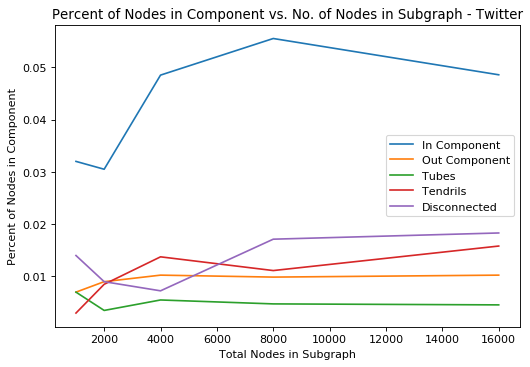

In [208]:
figure(figsize=(7.5, 5), dpi=80)
plt.plot(df['Count Nodes'], df['In Component'])
plt.plot(df['Count Nodes'], df['Out Component'])
plt.plot(df['Count Nodes'], df['Tubes'])
plt.plot(df['Count Nodes'], df['Tendrils'])
plt.plot(df['Count Nodes'], df['Disconnected'])
plt.title('Percent of Nodes in Component vs. No. of Nodes in Subgraph - Twitter')
plt.xlabel('Total Nodes in Subgraph')
plt.ylabel('Percent of Nodes in Component')
plt.legend(('In Component', 'Out Component', 'Tubes', 'Tendrils', 'Disconnected'), loc='best')
plt.show()

#### SCC % for different sizes of subgraphs is plotted separately for easier visualization of values.

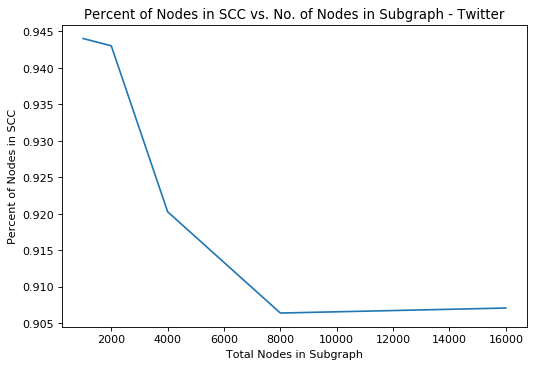

In [209]:
figure(figsize=(7.5, 5), dpi=80)
plt.plot(df['Count Nodes'], df['SCC'])
plt.title('Percent of Nodes in SCC vs. No. of Nodes in Subgraph - Twitter')
plt.xlabel('Total Nodes in Subgraph')
plt.ylabel('Percent of Nodes in SCC')
plt.show()

## Who-trusts-who network from Epinions.net (directed)

In [159]:
# get first 150 unique nodes in Epinions graph
nodes = []
n = 150
counter = 0

with open('soc-Epinions1.txt', encoding="utf8") as infile:
    for line in infile:
        if counter == n: 
            break
            
        node = int(line.split()[0])
        if node not in nodes:
            nodes.append(node)
            counter = counter + 1

In [160]:
count = len(nodes)
count

150

In [161]:
ep = snap.LoadEdgeList(snap.TNGraph, "soc-Epinions1.txt", 0, 1)
ep.GetEdges()

508837

In [162]:
sub_ep = ep.GetSubGraph(nodes)
sub_ep.GetEdges()

4163

### Epinions.net network data has been preprocessed. A subgraph of the network with 150 nodes and 4163 edges will be analyzed.

In [163]:
labels_ep = {}
for NI in sub_ep.Nodes():
    labels_ep[NI.GetId()] = str(NI.GetId())
sub_ep.DrawGViz(snap.gvlNeato, "output_ep.png", " ", labels_ep)

![alt text](output_ep.png)

### Average distance and diameter

In [165]:
result = sub_ep.GetBfsEffDiam(count, nodes, False)
avg_dist = result[0]
diameter = result[2]

In [166]:
dist = pd.DataFrame([[avg_dist, diameter]], columns=['Avg Distance', 'Diameter'])
dist

,Avg Distance,Diameter
0,1.869724,3


### Degree centrality

In [168]:
# cannot calculate degree centrality for a directed graph

### Betweenness centrality

In [169]:
bc = {}
Nodes, Edges = sub_ep.GetBetweennessCentr(1.0)

for n in Nodes:
    bc[n] = Nodes[n]

In [170]:
max_bc = max(bc.items(), key=operator.itemgetter(1))[0]
max_bc

0

In [171]:
avg_bc = statistics.mean(bc.values())
avg_bc

56.81333333333333

In [172]:
bcs = pd.DataFrame([[max_bc, bc[max_bc], avg_bc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
bcs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,0,2657.439401,56.813333


### Closeness centrality

In [173]:
cc = {}
for NI in sub_ep.Nodes():
    cc[NI.GetId()] = sub_ep.GetClosenessCentr(NI.GetId())

In [174]:
max_cc = max(cc.items(), key=operator.itemgetter(1))[0]
max_cc

0

In [175]:
avg_cc = statistics.mean(cc.values())
avg_cc

0.5728522850449893

In [176]:
ccs = pd.DataFrame([[max_cc, cc[max_cc], avg_cc]], 
                     columns=['Node w/Max Centrality', 'Max Centrality Value', 'Avg Centrality Value'])
ccs

,Node w/Max Centrality,Max Centrality Value,Avg Centrality Value
0,0,0.986755,0.572852


### Clustering coefficient

In [177]:
ccf = sub_ep.GetClustCf(-1)
ccf

0.5364951966600079

### Bridges

In [178]:
# cannot find bridges for a directed graph

### Bowtie structure

In [198]:
edata1000 = in_out(1000, 'soc-Epinions1.txt')
edata1000

[1000, 0.0, 0.005, 0.995, 0.0, 0.0, 0.0]

In [199]:
edata2000 = in_out(2000, 'soc-Epinions1.txt')
edata2000

[2000, 0.0, 0.0065, 0.9935, 0.0, 0.0, 0.0]

In [200]:
edata4000 = in_out(4000, 'soc-Epinions1.txt')
edata4000

[4000, 0.002, 0.0115, 0.9865, 0.0, 0.0, 0.0]

In [201]:
edata8000 = in_out(8000, 'soc-Epinions1.txt')
edata8000

[8000, 0.008125, 0.026875, 0.963375, 0.0, 0.001625, 0.0]

In [202]:
edata16000 = in_out(16000, 'soc-Epinions1.txt')
edata16000

[16000, 0.0153125, 0.031125, 0.951875, 0.0006875, 0.0016875, 0.0]

In [203]:
edf = pd.DataFrame([edata1000, edata2000, edata4000, edata8000, edata16000], columns = ['Count Nodes', 'In Component', 'Out Component', 'SCC', 'Tubes', 'Tendrils', 'Disconnected'])
edf

,Count Nodes,In Component,Out Component,SCC,Tubes,Tendrils,Disconnected
0,1000,0.000000,0.005000,0.995000,0.000000,0.000000,0.0
1,2000,0.000000,0.006500,0.993500,0.000000,0.000000,0.0
2,4000,0.002000,0.011500,0.986500,0.000000,0.000000,0.0
3,8000,0.008125,0.026875,0.963375,0.000000,0.001625,0.0
4,16000,0.015312,0.031125,0.951875,0.000687,0.001687,0.0


#### Only In Component, Out Component, and SCC are plotted because the percent of Tubes, Tendrils, and Disconnected Components are zero or negligible.

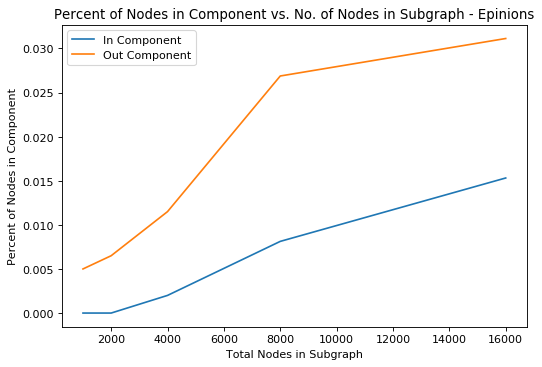

In [207]:
figure(figsize=(7.5, 5), dpi=80)
plt.plot(edf['Count Nodes'], edf['In Component'])
plt.plot(edf['Count Nodes'], edf['Out Component'])
plt.title('Percent of Nodes in Component vs. No. of Nodes in Subgraph - Epinions')
plt.xlabel('Total Nodes in Subgraph')
plt.ylabel('Percent of Nodes in Component')
plt.legend(('In Component', 'Out Component'), loc='best')
plt.show()

#### SCC % for different sizes of subgraphs is plotted separately for easier visualization of values.

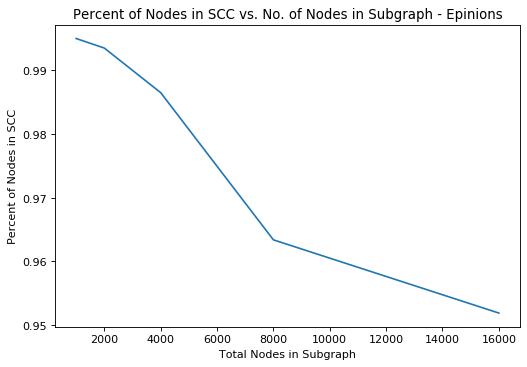

In [211]:
figure(figsize=(7.5, 5), dpi=80)
plt.plot(edf['Count Nodes'], edf['SCC'])
plt.title('Percent of Nodes in SCC vs. No. of Nodes in Subgraph - Epinions')
plt.xlabel('Total Nodes in Subgraph')
plt.ylabel('Percent of Nodes in SCC')
plt.show()